In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
def build_color_arrays(path):
    # reads a image, convert colors from BGR to RGB, and then to np array
    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_to_array = np.asarray(img_rgb)[0]

    # deals with array, removes duplicates and sorts the df
    df = pd.DataFrame(img_to_array, columns=['r', 'g', 'b'])
    df['duplicate?'] = df.duplicated()
    unique_df = df.loc[df['duplicate?'] == False]
    sorted_df = unique_df.sort_values(['r', 'g', 'b'])
    del sorted_df['duplicate?']

    # builds python list from dataframe
    color_array_sorted = []
    for color in sorted_df.index:
        r, g, b = sorted_df['r'][color], sorted_df['g'][color], sorted_df['b'][color]
        color_array_sorted.append((r, g, b))
    
    # slices the list into three equal parts, to get bright, medium, and darker colors
    size = len(color_array_sorted)
    n = int(size / 3)
    dark = color_array_sorted[0:n]
    medium = color_array_sorted[n:n+n]
    bright = color_array_sorted[n+n:n+n+n]
    
    return [
        dark,
        medium,
        bright,
        color_array_sorted
    ]


In [9]:
import random
from PIL import Image


def build_palettes(dark, medium, bright, all_color):
    dark = random.sample(dark, 5)
    medium = random.sample(medium, 5)
    bright = random.sample(bright, 5)
    all_color = random.sample(all_color, 5)

    dark_palette = Image.new(mode='RGBA', size=(100, 500), color=(0, 0, 0))
    medium_palette = Image.new(mode='RGBA', size=(100, 500), color=(0, 0, 0))
    bright_palette = Image.new(mode='RGBA', size=(100, 500), color=(0, 0, 0))
    all_palette = Image.new(mode='RGBA', size=(100, 500), color=(0, 0, 0))

    count = 0
    for col in range(0, 5):
        color_dark = Image.new(mode='RGBA', size=(100, 100), color=dark[col])
        dark_palette.paste(color_dark, (0, count))

        color_medium = Image.new(mode='RGBA', size=(100, 100), color=medium[col])
        medium_palette.paste(color_medium, (0, count))

        color_bright = Image.new(mode='RGBA', size=(100, 100), color=bright[col])
        bright_palette.paste(color_bright, (0, count))

        color_all = Image.new(mode='RGBA', size=(100, 100), color=all_color[col])
        all_palette.paste(color_all, (0, count))
        count += 100

    
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 4, 1)
    ax1.set_title('Darker')
    ax1.imshow(dark_palette)

    ax2 = fig.add_subplot(1, 4, 2)
    ax2.set_title('Medium')
    ax2.imshow(medium_palette)

    ax3 = fig.add_subplot(1, 4, 3)
    ax3.set_title('Brighter')
    ax3.imshow(bright_palette)
    
    ax4 = fig.add_subplot(1, 4, 4)
    ax4.set_title('All')
    ax4.imshow(all_palette)

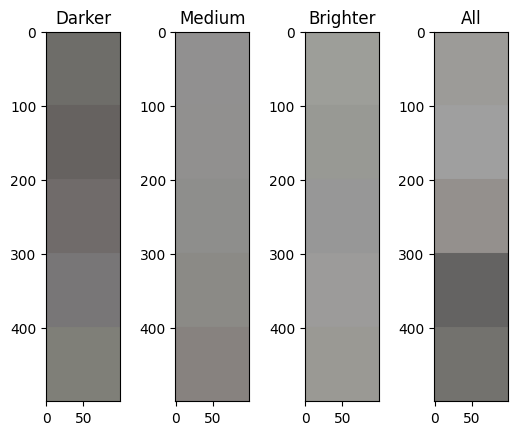

In [12]:
dark, medium, bright, color_arr = build_color_arrays('../assets/sample.png')
build_palettes(dark=dark, bright=bright, medium=medium, all_color=color_arr)